In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flowers102/cat_to_name.json
/kaggle/input/flowers102/flowers/flowers/valid/7/image_07216.jpg
/kaggle/input/flowers102/flowers/flowers/valid/47/image_04957.jpg
/kaggle/input/flowers102/flowers/flowers/valid/47/image_04989.jpg
/kaggle/input/flowers102/flowers/flowers/valid/47/image_05007.jpg
/kaggle/input/flowers102/flowers/flowers/valid/17/image_03876.jpg
/kaggle/input/flowers102/flowers/flowers/valid/17/image_03829.jpg
/kaggle/input/flowers102/flowers/flowers/valid/17/image_03908.jpg
/kaggle/input/flowers102/flowers/flowers/valid/17/image_03843.jpg
/kaggle/input/flowers102/flowers/flowers/valid/17/image_03883.jpg
/kaggle/input/flowers102/flowers/flowers/valid/17/image_03831.jpg
/kaggle/input/flowers102/flowers/flowers/valid/17/image_03851.jpg
/kaggle/input/flowers102/flowers/flowers/valid/17/image_03834.jpg
/kaggle/input/flowers102/flowers/flowers/valid/17/image_03890.jpg
/kaggle/input/flowers102/flowers/flowers/valid/17/image_03868.jpg
/kaggle/input/flowers102/flowers/fl

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib.pyplot as plt
import json


In [3]:
img_height = 224
img_width = 224

# Train_ds and Valid_ds
train_ds = tf.keras.utils.image_dataset_from_directory(
  "/kaggle/input/flowers102/flowers/flowers/train",
  validation_split=None,
  image_size=(img_height, img_width),
  batch_size=128,
  seed=42,
  shuffle=True)

val_ds = tf.keras.utils.image_dataset_from_directory('/kaggle/input/flowers102/flowers/flowers/valid',
  validation_split=None,
  image_size=(img_height, img_width),
  batch_size=128,
  seed=42,
  shuffle=True)

Found 6552 files belonging to 102 classes.
Found 818 files belonging to 102 classes.


In [4]:
# since train_ds have folder names so let's check them
flower_classes = sorted(os.listdir("/kaggle/input/flowers102/flowers/flowers/train"))
num_classes = len(flower_classes)

In [5]:
print(num_classes)

102


In [6]:
print(flower_classes)

['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [7]:
# mapping folder name to class name (for evaluating result at last step)

def get_flower_name(val):
    return cat_to_name[train_ds.class_names[val]]

file = open('/kaggle/input/flowers102/cat_to_name.json')
cat_to_name = json.load(file)
cat_to_name

{'21': 'fire lily',
 '3': 'canterbury bells',
 '45': 'bolero deep blue',
 '1': 'pink primrose',
 '34': 'mexican aster',
 '27': 'prince of wales feathers',
 '7': 'moon orchid',
 '16': 'globe-flower',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '79': 'toad lily',
 '39': 'siam tulip',
 '24': 'red ginger',
 '67': 'spring crocus',
 '35': 'alpine sea holly',
 '32': 'garden phlox',
 '10': 'globe thistle',
 '6': 'tiger lily',
 '93': 'ball moss',
 '33': 'love in the mist',
 '9': 'monkshood',
 '102': 'blackberry lily',
 '14': 'spear thistle',
 '19': 'balloon flower',
 '100': 'blanket flower',
 '13': 'king protea',
 '49': 'oxeye daisy',
 '15': 'yellow iris',
 '61': 'cautleya spicata',
 '31': 'carnation',
 '64': 'silverbush',
 '68': 'bearded iris',
 '63': 'black-eyed susan',
 '69': 'windflower',
 '62': 'japanese anemone',
 '20': 'giant white arum lily',
 '38': 'great masterwort',
 '4': 'sweet pea',
 '86': 'tree mallow',
 '101': 'trumpet creeper',
 '42': 'daffodil',
 '22': 'pincushion flower',
 

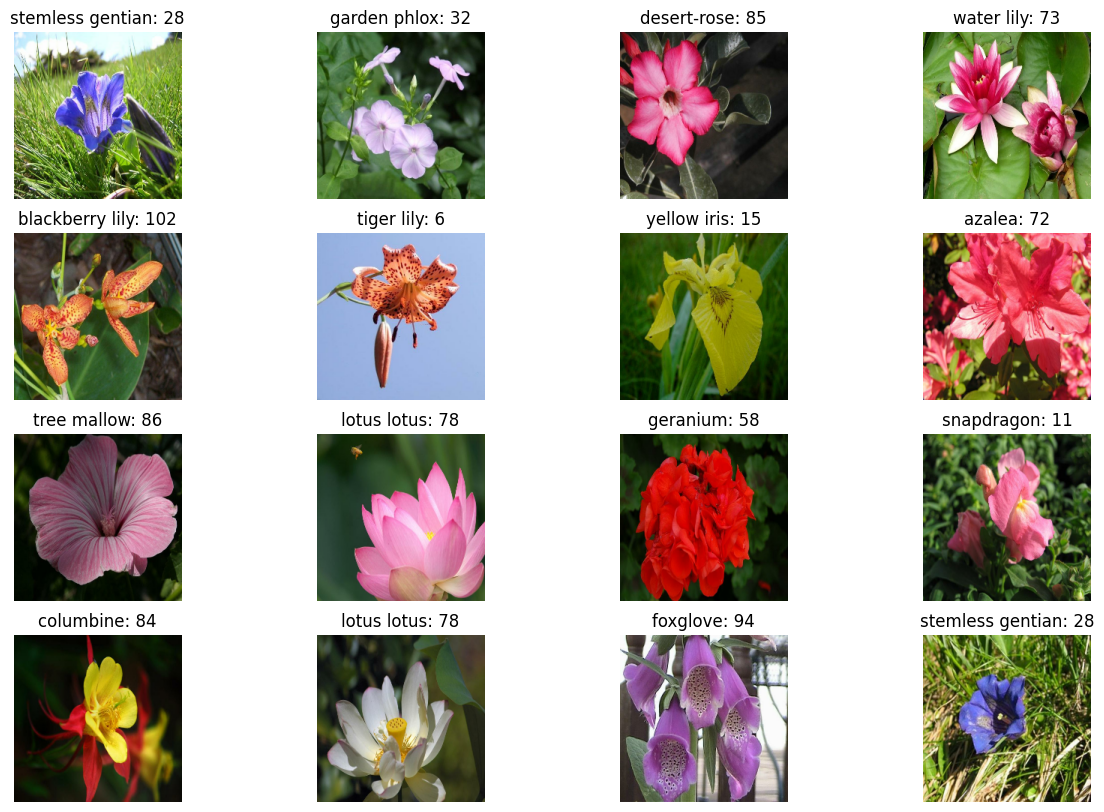

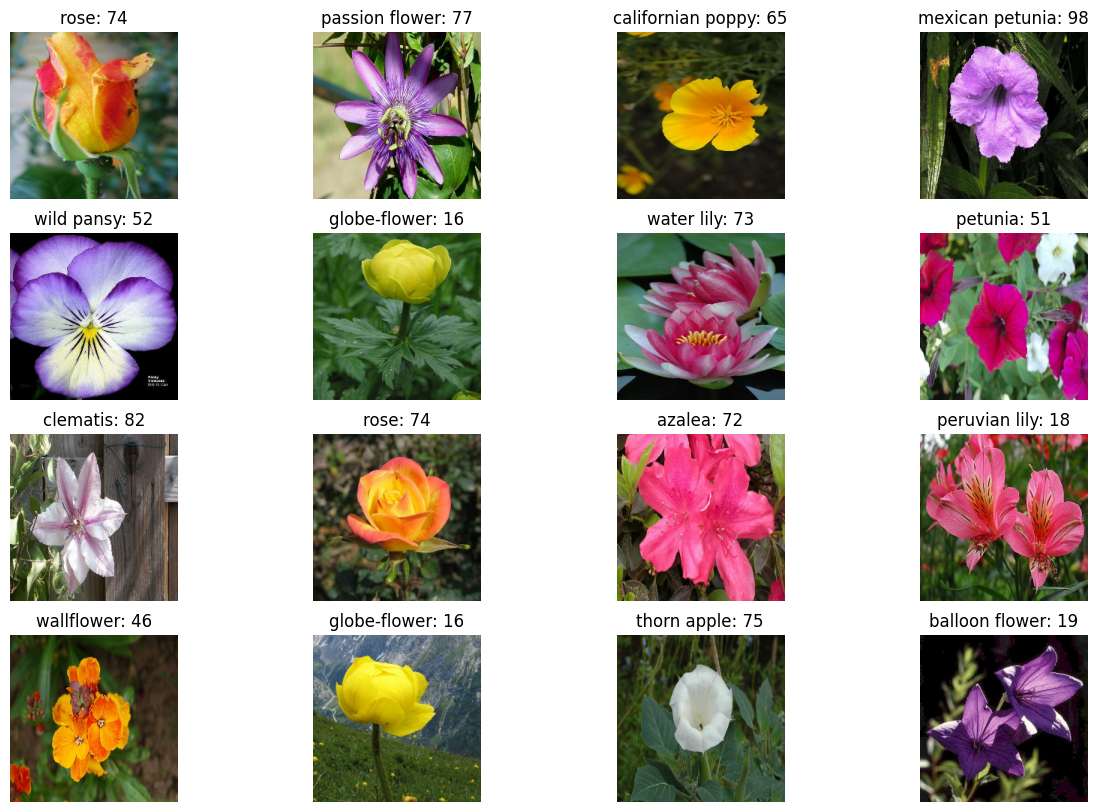

In [8]:
#  Let's Visualize some images
for data in train_ds.take(2):
    images, labels = data[0], data[1]
    
    _, ax = plt.subplots(4, 4, figsize=(15, 10))

    for i in range(16): # half number of batch
        img = np.array(images[i]).astype('uint8')
        label = labels[i]
        label = get_flower_name(label) + ": "+str(np.array(flower_classes[label]))
        
        ax[i // 4, i % 4].imshow(img)
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")

plt.show()

In [9]:
#  check frequncy of classes
all_labels = []
for data in train_ds.take(-1):
    labels = data[1]
    all_labels.append(np.array(labels))
    
def freq_get(all_labels):
    dicto = {}
    for num in range(0, 102):
        dicto[str(num)] = 0
        for i in range(len(all_labels)):
            for j in range(len(all_labels[i])):
                if num == all_labels[i][j]:
                    dicto[str(num)] += 1
    return dicto
dicto = freq_get(all_labels)
dicto

{'0': 27,
 '1': 38,
 '2': 35,
 '3': 49,
 '4': 36,
 '5': 68,
 '6': 73,
 '7': 38,
 '8': 44,
 '9': 38,
 '10': 36,
 '11': 60,
 '12': 65,
 '13': 38,
 '14': 49,
 '15': 46,
 '16': 34,
 '17': 47,
 '18': 72,
 '19': 35,
 '20': 34,
 '21': 33,
 '22': 36,
 '23': 55,
 '24': 62,
 '25': 36,
 '26': 61,
 '27': 48,
 '28': 36,
 '29': 31,
 '30': 28,
 '31': 33,
 '32': 62,
 '33': 92,
 '34': 44,
 '35': 33,
 '36': 44,
 '37': 54,
 '38': 97,
 '39': 49,
 '40': 100,
 '41': 73,
 '42': 33,
 '43': 157,
 '44': 61,
 '45': 57,
 '46': 38,
 '47': 54,
 '48': 73,
 '49': 206,
 '50': 67,
 '51': 70,
 '52': 47,
 '53': 56,
 '54': 92,
 '55': 50,
 '56': 86,
 '57': 56,
 '58': 35,
 '59': 85,
 '60': 36,
 '61': 48,
 '62': 42,
 '63': 42,
 '64': 88,
 '65': 51,
 '66': 36,
 '67': 43,
 '68': 46,
 '69': 33,
 '70': 51,
 '71': 64,
 '72': 77,
 '73': 147,
 '74': 142,
 '75': 95,
 '76': 83,
 '77': 205,
 '78': 112,
 '79': 34,
 '80': 70,
 '81': 82,
 '82': 135,
 '83': 82,
 '84': 104,
 '85': 66,
 '86': 48,
 '87': 48,
 '88': 51,
 '89': 116,
 '90': 153

In [10]:
values = list(dicto.values())
np.min(values), np.max(values) # classes are imbalanced colud be solved by augmentation

(27, 206)

In [12]:
base_model = tf.keras.applications.ResNet50(include_top=True, weights='/kaggle/input/rasenet/resnet50_weights_tf_dim_ordering_tf_kernels.h5')


In [13]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [15]:
# Freeze all the layers
for layer in base_model.layers[:]:
    layer.trainable = False
    
# Add Dense layer as in ResNet50
inputs = tf.keras.Input(shape=(224, 224, 3))

# normalization + same preprocessing
output = tf.keras.applications.resnet50.preprocess_input(inputs) # equivilent to Rescalling as next line (feature engineering)
# output = tf.keras.layers.Rescaling(scale=1/127.5, offset=-1)(inputs)

output = base_model(output, training=False)
# output = tf.keras.layers.Flatten()(output)
# output = tf.keras.layers.Dense(units=4096, activation='relu')(output)
output = tf.keras.layers.Dense(units=4096, activation='relu')(output)
output = tf.keras.layers.Dense(units=10, activation='softmax')(output)

#output = tf.keras.layers.GlobalAveragePooling2D()(output)
output = tf.keras.layers.Dense(units=102, activation='softmax')(output)
model = tf.keras.Model(inputs, output)

In [17]:
# Defining callbacks

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) # early stopping
# csv_logger = CSVLogger(os.path.join('eval','4_eval_resnet_pretrained.log')) # save metrics/loss in folder
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto')
# reduce lr equation

In [ ]:
n_epochs = 20
opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy']) # accuracy
history = model.fit(train_ds, validation_data=val_ds, epochs=n_epochs, verbose = 1, callbacks=[es_callback, lr_callback])

Epoch 1/20
52/52 [==============================] - 852s 16s/step - loss: 4.6011 - sparse_categorical_accuracy: 0.0288 - val_loss: 4.5681 - val_sparse_categorical_accuracy: 0.0269 - lr: 0.0010
Epoch 2/20
52/52 [==============================] - 844s 16s/step - loss: 4.5454 - sparse_categorical_accuracy: 0.0391 - val_loss: 4.5121 - val_sparse_categorical_accuracy: 0.0550 - lr: 0.0010
Epoch 3/20
52/52 [==============================] - 828s 16s/step - loss: 4.4934 - sparse_categorical_accuracy: 0.0546 - val_loss: 4.4672 - val_sparse_categorical_accuracy: 0.0623 - lr: 0.0010
Epoch 4/20
52/52 [==============================] - 791s 15s/step - loss: 4.4496 - sparse_categorical_accuracy: 0.0528 - val_loss: 4.4292 - val_sparse_categorical_accuracy: 0.0562 - lr: 0.0010
Epoch 5/20
 4/52 [=>............................] - ETA: 11:25 - loss: 4.4373 - sparse_categorical_accuracy: 0.0469

In [ ]:
model.evaluate(val_ds)

In [ ]:
def plot_function(history):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # categorical_acc + loss | val_categorical_acc + loss

    axes[0].plot(history['sparse_categorical_accuracy'], label='train acc')
    axes[0].plot(history['val_sparse_categorical_accuracy'], label='val acc')
    axes[0].set_title('Train Accuracy vs Val Accuracy')
    axes[0].set_xlabel('epochs')
    axes[0].legend()

    axes[1].plot(history['loss'], label='train loss')
    axes[1].plot(history['val_loss'], label='val loss')
    axes[1].set_title('Train loss vs Val loss')
    axes[1].set_xlabel('epochs')
    axes[1].legend()
    plt.show()

In [ ]:
plot_function(history.history)


In [ ]:
# Print training history and accuracy
print(history.history)
print("Training Accuracy:", max(history.history['accuracy']))
print("Validation Accuracy:", max(history.history['val_accuracy']))

In [ ]:
# Save the model
 model.save('flower_classification_model_pretrained.h5')